In [44]:
import vaex
import os
import numpy as np
current_dir  = os.getcwd()
loading_appl = os.path.join(current_dir,"data","clean",
                            "flash_crash","AAPL.OQ-2010")
import sys
src_path = current_dir + "/src"
sys.path.append(src_path)
plots_dir = os.path.join(current_dir,"plots","flash_crash",
                        "AAPL.OQ-2010")

In [23]:
import dataFrameInspection
import graphs

In [6]:
os.listdir(loading_appl)

['test1', '.ipynb_checkpoints', '2010-12-31-2010-12-31-events.arrow']

In [7]:
%%time

df=vaex.open(os.path.join(loading_appl,"2010-12-31-2010-12-31-events.arrow"))
df

CPU times: user 230 ms, sys: 92.6 ms, total: 323 ms
Wall time: 352 ms


#,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,index
0,nan,nan,213.32,1.0,213.42,1.0,2010-01-04 14:30:00.000999936
1,nan,nan,213.37,1.0,213.5,3.0,2010-01-04 14:30:00.009000192
2,nan,nan,213.38,2.0,213.5,1.0,2010-01-04 14:30:00.020000
3,nan,nan,213.39,1.0,213.5,1.0,2010-01-04 14:30:00.042000128
4,nan,nan,213.4,1.0,213.5,1.0,2010-01-04 14:30:00.087999744
...,...,...,...,...,...,...,...
"32,198,847",322.49,100.0,322.48,24.0,322.49,26.0,2010-12-31 20:59:59.733999872
"32,198,848",nan,nan,322.48,24.0,322.49,16.0,2010-12-31 20:59:59.786999552
"32,198,849",322.49,1600.0,322.48,24.0,322.66,41.0,2010-12-31 20:59:59.798999552
"32,198,850",322.49,1093.0,nan,nan,nan,nan,2010-12-31 20:59:59.808000


#### Initial Inspection:        
Plan :       

1-Time evolution of each column    
2-First stylized facts of the variables

#### Measure of security : 

In [13]:
df_copy = df 

type(df)

In [12]:
df.dtypes

trade_price            float64
trade_volume           float64
bid-price              float64
bid-volume             float64
ask-price              float64
ask-volume             float64
index           datetime64[ns]
dtype: object

In [ ]:
##Adapting the time zone to America/New York
index_series = pd.DatetimeIndex(df['index'].values)

# Convert timezone to America/New_York
index_series = index_series.tz_localize('UTC').tz_convert('America/New_York')


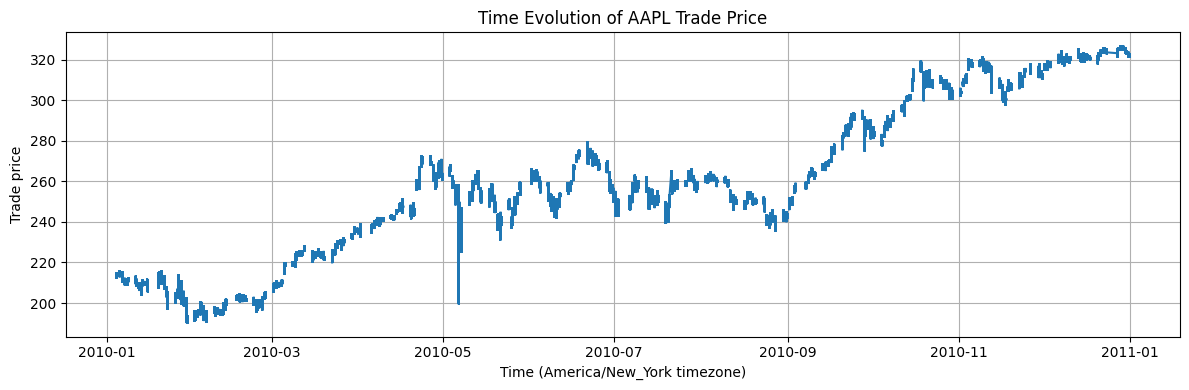

In [30]:
graphs.plotYvsX(index_series, df['trade_price'].values,
                'Time (America/New_York timezone)','Trade price',
                f'Time Evolution of AAPL Trade Price',plots_dir)
               
               

#### Remarks : 

- Since the data is too long, it takes some time to plot the graph.
- The small gaps is due to the time between closing and opening hours for which there are no trades. 

We can see clearly from the graph the abrupt drop in the stock price: This happened in the beginning of May month, the Flash crahs is known at the date : The May 6, 2010, flash crash also known as the crash of 2:45 

### Analysing the flash crash day  
#### Trade price


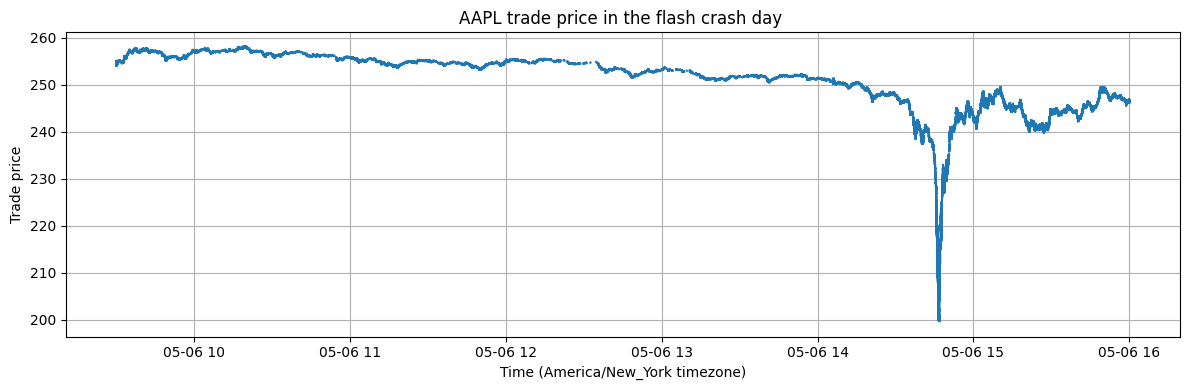

In [37]:
start_date = '2010-05-06'
end_date = '2010-05-07'
filtered_df = df[(df['index'] >= start_date) & (df['index'] <= end_date)]
filtered_index_series = index_series[(index_series >= start_date) & (index_series <= end_date)]
graphs.plotYvsX(filtered_index_series, filtered_df['trade_price'].values,
                'Time (America/New_York timezone)','Trade price',
                f'AAPL trade price in the flash crash day ',plots_dir)

#### We can see clearly that the crash happened around 2Pm :45   
#### Trade volume    


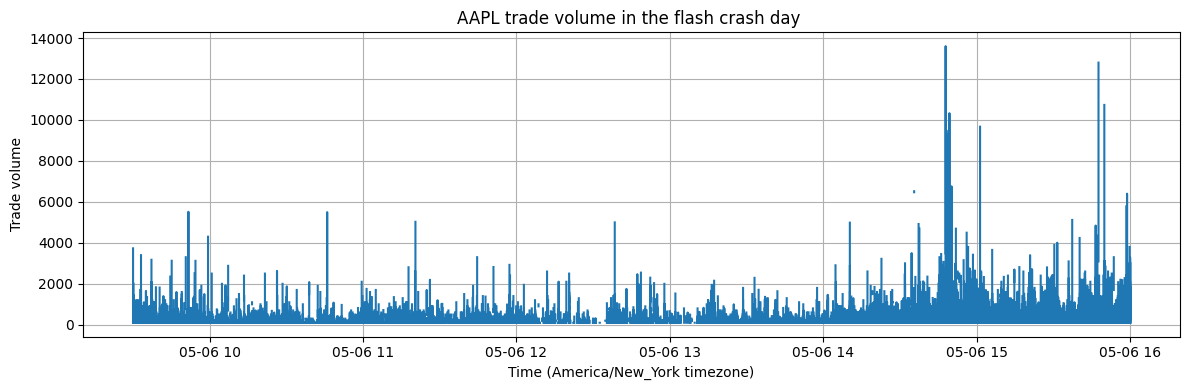

In [39]:
graphs.plotYvsX(filtered_index_series, filtered_df['trade_volume'].values,
                'Time (America/New_York timezone)','Trade volume',
                f'AAPL trade volume in the flash crash day ',plots_dir)

#### Discussion: We notice that the volume trade shows a strange fact : Unsuprisingly in at the time of flash, there was a very high volume being traded (Logically people selling their stocks). 
But there are also another peak  of the same level roughly that happened during the closing price hour. 

Is that a coincidence ? 

#### Ask Price 

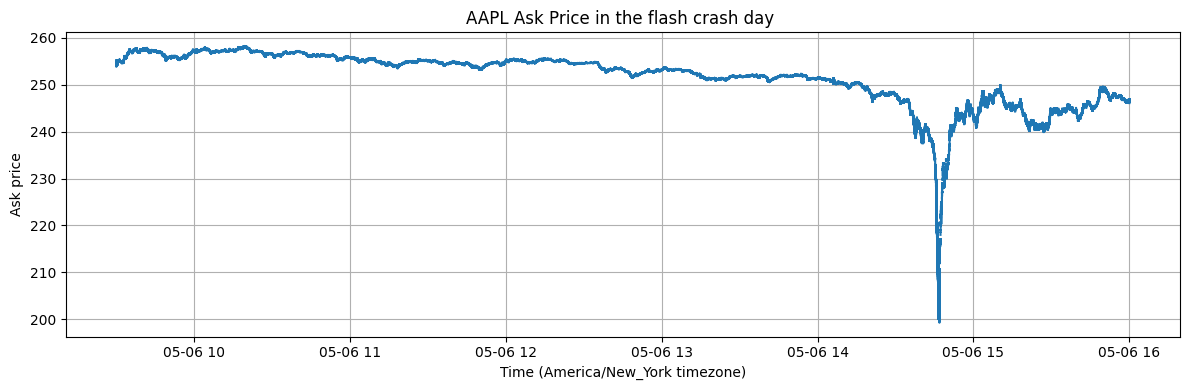

In [40]:
graphs.plotYvsX(filtered_index_series, filtered_df['ask-price'].values,
                'Time (America/New_York timezone)','Ask price',
                f'AAPL Ask Price in the flash crash day ',plots_dir)

#### Bid Price 

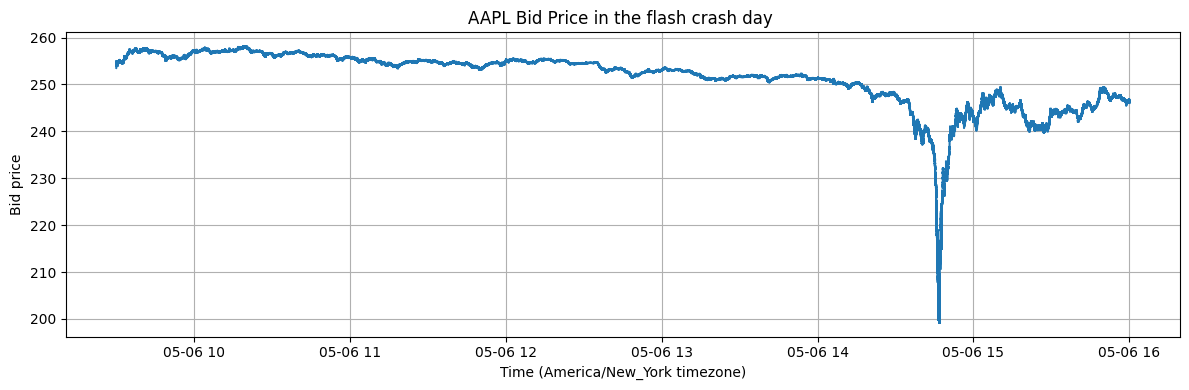

In [41]:
graphs.plotYvsX(filtered_index_series, filtered_df['bid-price'].values,
                'Time (America/New_York timezone)','Bid price',
                f'AAPL Bid Price in the flash crash day ',plots_dir)

#### Spread

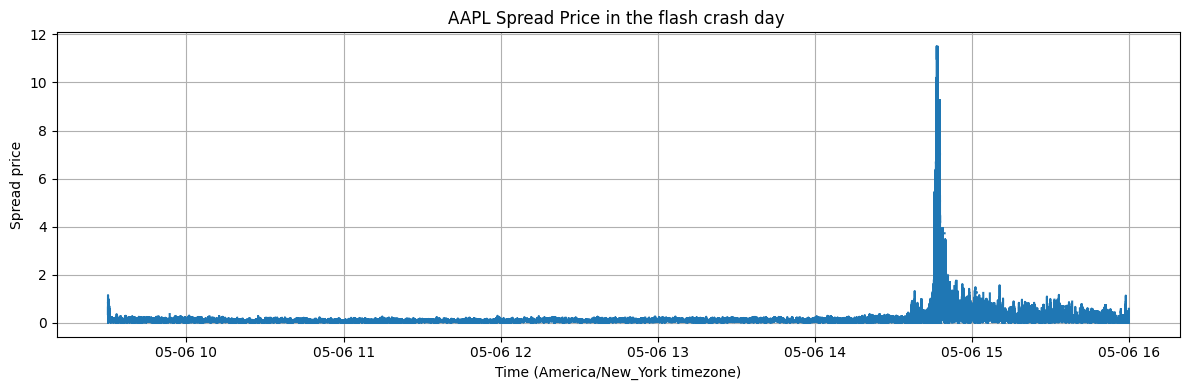

In [45]:
graphs.plotYvsX(filtered_index_series,
                np.array(filtered_df['ask-price'].values)- np.array(filtered_df['bid-price'].values),
                'Time (America/New_York timezone)','Spread price',
                f'AAPL Spread Price in the flash crash day ',plots_dir)

#### Discussion : 
Both Bid and Ask price seems to follow closely the trade price, the spread is almost zero during the day,  except during the crash where there is a small gap : 12$ between the ask and bid, this is insignifcant as it represents around  than 5% of the the trade price 

#### Ask volume 

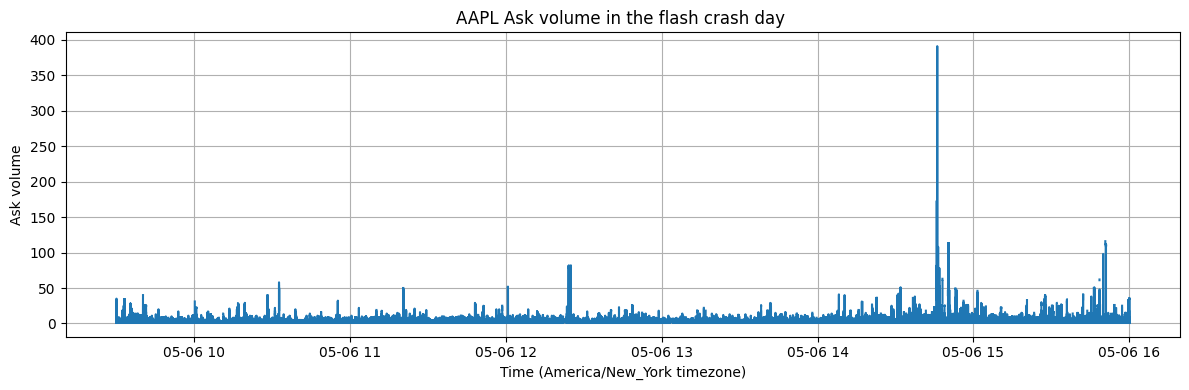

In [46]:
graphs.plotYvsX(filtered_index_series, filtered_df['ask-volume'].values,
                'Time (America/New_York timezone)','Ask volume',
                f'AAPL Ask volume in the flash crash day ',plots_dir)

### Bid volume 

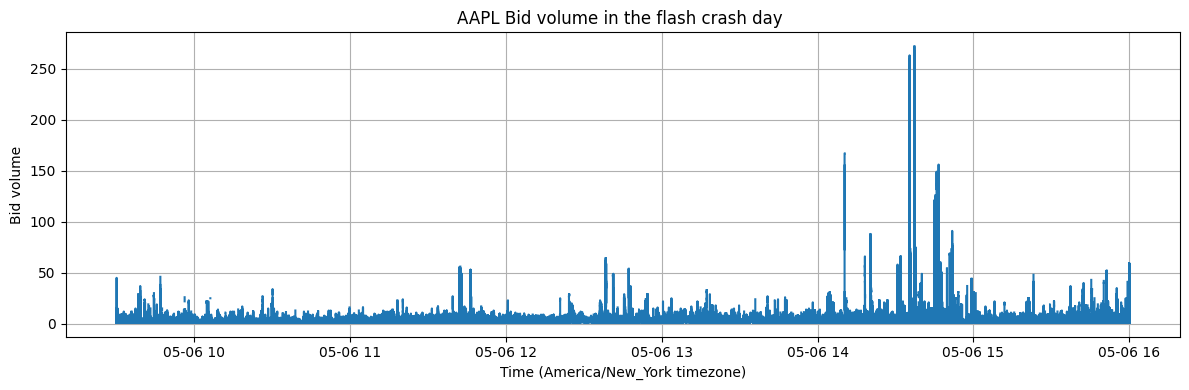

In [47]:
graphs.plotYvsX(filtered_index_series, filtered_df['bid-volume'].values,
                'Time (America/New_York timezone)','Bid volume',
                f'AAPL Bid volume in the flash crash day ',plots_dir)

#### Discussion : 
Ask volume represents a peak at the flash crash, otherwise it is quite stable during that day, while for bid volume, there are more peaks shown in the graph, and even during the flash hour, the peaks are higher compared to ask volume peak. 

#### Intraday Results      
1-Number of trades  per 5 min during the day of the Crahs 

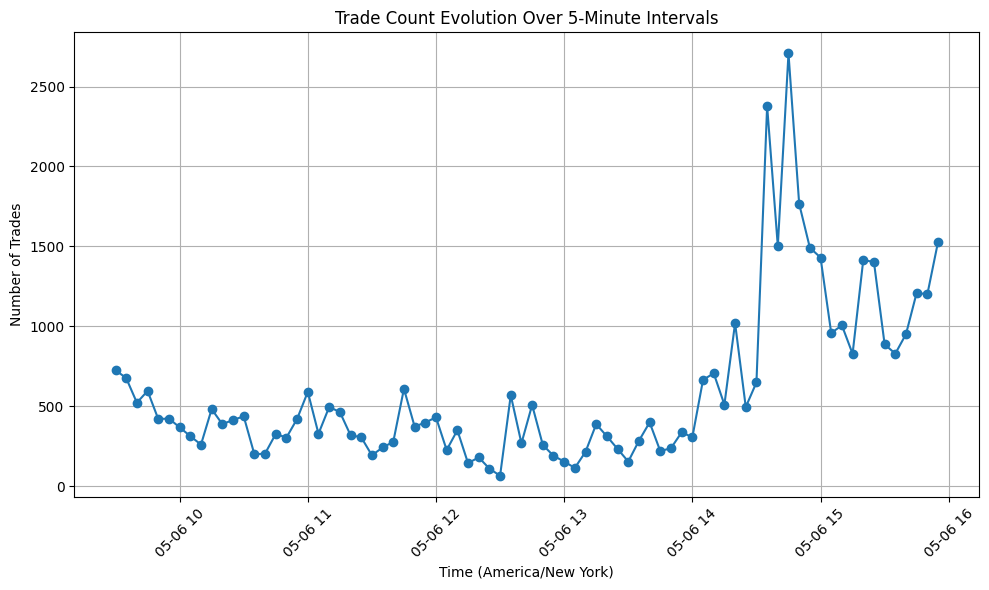

In [87]:
# Assuming df is your existing Vaex DataFrame with 'index' as datetime64[ns]

# Extract hour, minute, and second components
df['hour'] = df['index'].dt.hour
df['minute'] = df['index'].dt.minute
df['second'] = df['index'].dt.second

# Calculate total seconds and create 5-minute bins
df['seconds'] = df['hour'] * 3600 + df['minute'] * 60 + df['second']
df['5m_bin'] = (df['seconds'] // (5 * 60)) * (5 * 60)

filtered_df = df[(df['index'] >= start_date) & (df['index'] <= end_date)]
# Group by 5-minute bins and count the trades
# Assuming 'trade_price' is the column representing a trade
trades_per_5mn = filtered_df.groupby('5m_bin', agg={'trade_count': vaex.agg.count('trade_price')})
trades_per_5mn_pd = trades_per_5mn.to_pandas_df()
# Sort the DataFrame by the 5-minute bin
trades_per_5mn_pd = trades_per_5mn_pd.sort_values(by='5m_bin')

# Base datetime (you can adjust this to match the start of your data or any known reference point)
base_datetime = pd.Timestamp(start_date)

# Convert 5m_bin back to datetime
trades_per_5mn_pd['datetime'] = pd.to_timedelta(trades_per_5mn_pd['5m_bin'], unit='s') + base_datetime

# Convert datetime to America/New York timezone
eastern = pytz.timezone('America/New_York')
trades_per_5mn_pd['datetime'] = trades_per_5mn_pd['datetime'].dt.tz_localize(pytz.utc).dt.tz_convert(eastern)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(trades_per_5mn_pd['datetime'], trades_per_5mn_pd['trade_count'], marker='o')
plt.ylabel("Number of Trades")
plt.xlabel("Time (America/New York)")
plt.title("Trade Count Evolution Over 5-Minute Intervals")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Time between transactions: 

In [91]:
pd_df = filtered_df.to_pandas_df()


In [96]:
pd_df

,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,index,hour,minute,second,seconds,5m_bin
0,NaN,NaN,253.53,6.0,254.17,8.0,2010-05-06 13:30:00.048000768,13,30,0,48600,48600
1,NaN,NaN,253.53,6.0,254.15,5.0,2010-05-06 13:30:00.101999872,13,30,0,48600,48600
2,NaN,NaN,253.53,6.0,253.89,1.0,2010-05-06 13:30:00.134000128,13,30,0,48600,48600
3,NaN,NaN,253.53,7.0,253.89,1.0,2010-05-06 13:30:00.140000000,13,30,0,48600,48600
4,NaN,NaN,253.53,7.0,254.15,5.0,2010-05-06 13:30:00.226000128,13,30,0,48600,48600
...,...,...,...,...,...,...,...,...,...,...,...,...
198209,246.140,845.0,246.12,2.0,246.70,35.0,2010-05-06 19:59:59.721999872,19,59,59,71999,71700
198210,246.135,3055.0,NaN,NaN,NaN,NaN,2010-05-06 19:59:59.731999744,19,59,59,71999,71700
198211,246.620,100.0,NaN,NaN,NaN,NaN,2010-05-06 19:59:59.809999872,19,59,59,71999,71700
198212,NaN,NaN,246.11,1.0,246.70,35.0,2010-05-06 19:59:59.982000384,19,59,59,71999,71700


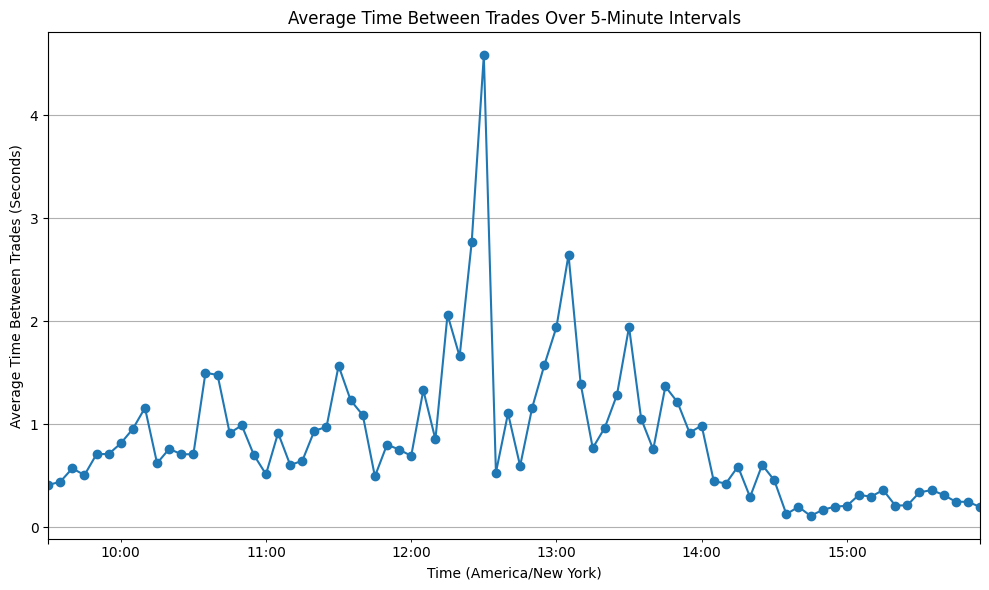

In [100]:
# Using the sample DataFrame created earlier
# Let's assume NA values in 'trade_price' indicate no trade

# Filter out rows where 'trade_price' is NA
trades_df = pd_df.dropna(subset=['trade_price']).copy()

# Set 'timestamp' as the index
trades_df.set_index('index', inplace=True)

# Calculate the time differences between consecutive trades
trades_df['time_diff'] = trades_df.index.to_series().diff().dt.total_seconds()

# Resample to 5-minute intervals and calculate the mean time difference
avg_time_diff_per_5mn = trades_df['time_diff'].resample('5T').mean()

# Convert the index to America/New York timezone for plotting
avg_time_diff_per_5mn.index = avg_time_diff_per_5mn.index.tz_localize('UTC').tz_convert('America/New_York')

# Plotting
plt.figure(figsize=(10, 6))
avg_time_diff_per_5mn.plot(marker='o')
plt.ylabel("Average Time Between Trades (Seconds)")
plt.xlabel("Time (America/New York)")
plt.title("Average Time Between Trades Over 5-Minute Intervals")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
